In [1]:
from Model import Model
from GameHistoryAnalysis import GameHistoryAnalysis
import matplotlib.pyplot as plt


# Investigation into token number relative to cooperative epochs for 1, 2, 3, 4 Tokens, averaged over 5 iterations
number_of_agents = 50
generations = 1000
game = 'PD'
learning_mechanism = 'GA'
tokens = 4
timeout = 100
iterations = 5
states = 8

cooperative_epochs_by_states_by_tokens = []
avg_percent_outcomes_by_states_by_tokens = []
for s in range(states):
    print('Starting Computation for computational capacity of ' + str(s))
    cooperative_epochs_by_tokens = []
    avg_percent_outcomes_by_tokens = []
    for t in range(tokens):
        print('Starting Computation for communication tokens: ' + str(t))
        total_coop_epochs = 0
        avg_percent_outcomes = [0, 0, 0]
        for i in range(iterations):
            print('Starting Iteration ' + str(i))
            model = Model(number_of_agents, s+1, t+1, generations, learning_mechanism, timeout, game)
            model.run_model()
            gha = GameHistoryAnalysis(model.game_history, number_of_agents)
            total_coop_epochs += gha.cooperative_epochs

            total = sum(gha.outcome_frequency)
            percent_outcomes = [(gha.outcome_frequency[m]/total) * 100 for m in range(3)]
            avg_percent_outcomes = [avg_percent_outcomes[j] + percent_outcomes[j] for j in range(3)]
        avg_percent_outcomes = [avg_percent_outcomes[k]/iterations for k in range(3)]
        avg_percent_outcomes_by_tokens.append(avg_percent_outcomes)
        cooperative_epochs_by_tokens.append(total_coop_epochs/iterations)
    avg_percent_outcomes_by_states_by_tokens.append(avg_percent_outcomes_by_tokens)
    cooperative_epochs_by_states_by_tokens.append(cooperative_epochs_by_tokens)


Starting Computation for computational capacity of 0
Starting Computation for communication tokens: 0
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 1
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 2
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 3
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for computational capacity of 1
Starting Computation for communication tokens: 0
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 1
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Ite

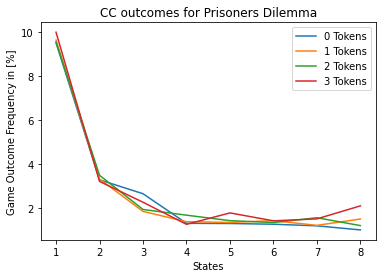

In [2]:
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [avg_percent_outcomes_by_states_by_tokens[p][t][0] for p in range(states)], label=str(t)+' Tokens')
plt.ylabel('Game Outcome Frequency in [%]')
plt.xlabel('States')
plt.title('CC outcomes for Prisoners Dilemma')
plt.legend()
plt.show()


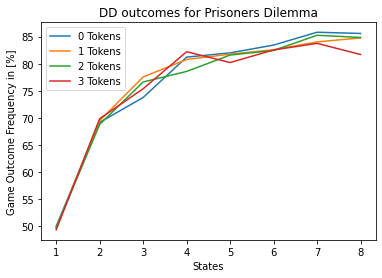

In [3]:
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [avg_percent_outcomes_by_states_by_tokens[p][t][1] for p in range(states)], label=str(t)+' Tokens')
plt.ylabel('Game Outcome Frequency in [%]')
plt.xlabel('States')
plt.title('DD outcomes for Prisoners Dilemma')
plt.legend()
plt.show()

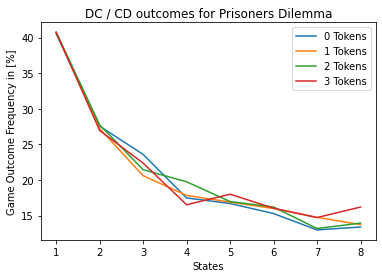

In [4]:
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [avg_percent_outcomes_by_states_by_tokens[p][t][2] for p in range(states)], label=str(t)+' Tokens')
plt.ylabel('Game Outcome Frequency in [%]')
plt.xlabel('States')
plt.title('DC / CD outcomes for Prisoners Dilemma')
plt.legend()
plt.show()

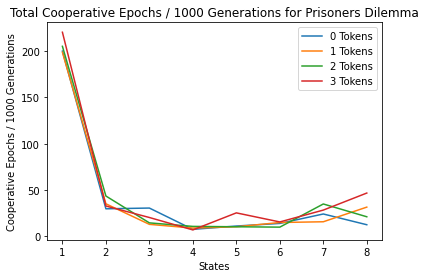

In [5]:
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [cooperative_epochs_by_states_by_tokens[s][t] for s in range(states)], label=str(t)+' Tokens')
plt.ylabel('Cooperative Epochs / 1000 Generations')
plt.xlabel('States')
plt.title('Total Cooperative Epochs / 1000 Generations for Prisoners Dilemma')
plt.legend()
plt.show()

In [7]:
print(avg_percent_outcomes_by_states_by_tokens)
print(cooperative_epochs_by_states_by_tokens)

[[[9.528760023408973, 49.92465976179493, 40.546580214796094], [9.656737569023525, 49.593067041306014, 40.75019538967045], [9.56684113972194, 49.68131803778455, 40.751840822493506], [10.010442712302053, 49.25717754105774, 40.7323797466402]], [[3.292312346049499, 69.1460445817471, 27.561643072203385], [3.3285684557028112, 69.46081071850115, 27.21062082579603], [3.497546011601565, 68.76181505315635, 27.740638935242078], [3.2185855229908915, 69.82710147045347, 26.95431300655564]], [[2.658122599094924, 73.74849702925687, 23.593380371648202], [1.8528241304646134, 77.54479751709698, 20.6023783524384], [1.9409192914096074, 76.61340665134655, 21.44567405724383], [2.270674709876307, 75.36178660371397, 22.367538686409727]], [[1.3103808150051148, 81.21397102096728, 17.4756481640276], [1.3851905043563686, 80.77677534391198, 17.838034151731645], [1.6813292338276242, 78.57198595461443, 19.746684811557948], [1.2638682299822395, 82.21192301291313, 16.524208757104628]], [[1.302295857953564, 82.001727828

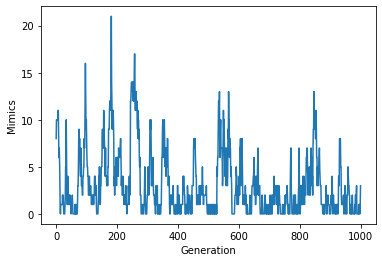

In [6]:
#%%

from Model import Model
from GameHistoryAnalysis import GameHistoryAnalysis

#%%

number_of_agents = 50
generations = 1000
game = 'PD'
learning_mechanism = 'GA'
agent_computation_capacity = 4
tokens = 3
timeout = 100

model = Model(number_of_agents, agent_computation_capacity, tokens, generations, learning_mechanism, timeout, game)
model.run_model()

#%%

gha = GameHistoryAnalysis(model.game_history, number_of_agents)
gha.plot_average_payoff()
gha.plot_average_regular_game_payoff()

#%%

gha.plot_total_communication()
gha.plot_total_regular_communication()

#%%

gha.plot_cooperation_percentage()

#%%

gha.plot_average_chat_length()
gha.plot_average_regular_chat_length()

#%%

gha.plot_number_of_unique_conversations()


#%%

gha.plot_NCD_agents()

#%%

gha.plot_CRC_agents()

#%%

gha.plot_CD_agents()

In [11]:
from Model import Model
from GameHistoryAnalysis import GameHistoryAnalysis
import matplotlib.pyplot as plt


number_of_agents = 50
generations = 1000
game = 'PD'
learning_mechanism = 'GA'
tokens = 4
timeout = 100
iterations = 5
states = 13

cooperative_epochs_by_states_by_tokens = [[200.0, 198.8, 205.2, 220.4], [29.8, 35.2, 43.6, 32.8], [30.6, 13.0, 14.6, 20.4], [7.6, 9.0, 10.8, 7.0], [11.2, 10.4, 10.4, 25.4], [14.0, 15.0, 10.0, 15.6], [24.2, 15.8, 35.0, 28.4], [12.6, 31.6, 21.2, 46.8]]
avg_percent_outcomes_by_states_by_tokens = [[[9.528760023408973, 49.92465976179493, 40.546580214796094], [9.656737569023525, 49.593067041306014, 40.75019538967045], [9.56684113972194, 49.68131803778455, 40.751840822493506], [10.010442712302053, 49.25717754105774, 40.7323797466402]], [[3.292312346049499, 69.1460445817471, 27.561643072203385], [3.3285684557028112, 69.46081071850115, 27.21062082579603], [3.497546011601565, 68.76181505315635, 27.740638935242078], [3.2185855229908915, 69.82710147045347, 26.95431300655564]], [[2.658122599094924, 73.74849702925687, 23.593380371648202], [1.8528241304646134, 77.54479751709698, 20.6023783524384], [1.9409192914096074, 76.61340665134655, 21.44567405724383], [2.270674709876307, 75.36178660371397, 22.367538686409727]], [[1.3103808150051148, 81.21397102096728, 17.4756481640276], [1.3851905043563686, 80.77677534391198, 17.838034151731645], [1.6813292338276242, 78.57198595461443, 19.746684811557948], [1.2638682299822395, 82.21192301291313, 16.524208757104628]], [[1.302295857953564, 82.00172782843086, 16.695976313615578], [1.350373921199364, 81.76189599160384, 16.8877300871968], [1.4313276253593503, 81.59974337553932, 16.968928999101315], [1.7845859530360202, 80.21434288409468, 18.0010711628693]], [[1.2689492537242024, 83.44395376864902, 15.287096977626783], [1.431278447598444, 82.5797721578837, 15.98894939451786], [1.3455695208178287, 82.44864386053142, 16.205786618650748], [1.4240491866005658, 82.53758866649397, 16.038362146905467]], [[1.1964212329275925, 85.81669242034562, 12.986886346726783], [1.2183286745363202, 84.02704994042928, 14.754621385034406], [1.56457399631699, 85.2556499428855, 13.179776060797522], [1.513507593687232, 83.76420294508722, 14.722289461225552]], [[1.0101462082196746, 85.59393360564677, 13.395920186133552], [1.5065883134961273, 84.76605109964069, 13.727360586863176], [1.2067320050471813, 84.84776769898208, 13.945500295970731], [2.1053716928615867, 81.69648417580827, 16.19814413133015]]]
for s in range(9, states):
    print('Starting Computation for computational capacity of ' + str(s))
    cooperative_epochs_by_tokens = []
    avg_percent_outcomes_by_tokens = []
    for t in range(tokens):
        print('Starting Computation for communication tokens: ' + str(t))
        total_coop_epochs = 0
        avg_percent_outcomes = [0, 0, 0]
        for i in range(iterations):
            print('Starting Iteration ' + str(i))
            model = Model(number_of_agents, s+1, t+1, generations, learning_mechanism, timeout, game)
            model.run_model()
            gha = GameHistoryAnalysis(model.game_history, number_of_agents)
            total_coop_epochs += gha.cooperative_epochs

            total = sum(gha.outcome_frequency)
            percent_outcomes = [(gha.outcome_frequency[m]/total) * 100 for m in range(3)]
            avg_percent_outcomes = [avg_percent_outcomes[j] + percent_outcomes[j] for j in range(3)]
        avg_percent_outcomes = [avg_percent_outcomes[k]/iterations for k in range(3)]
        avg_percent_outcomes_by_tokens.append(avg_percent_outcomes)
        cooperative_epochs_by_tokens.append(total_coop_epochs/iterations)
    avg_percent_outcomes_by_states_by_tokens.append(avg_percent_outcomes_by_tokens)
    cooperative_epochs_by_states_by_tokens.append(cooperative_epochs_by_tokens)
    print(avg_percent_outcomes_by_states_by_tokens)
    print(cooperative_epochs_by_states_by_tokens)

Starting Computation for computational capacity of 9
Starting Computation for communication tokens: 0
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 1
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 2
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
Starting Computation for communication tokens: 3
Starting Iteration 0
Starting Iteration 1
Starting Iteration 2
Starting Iteration 3
Starting Iteration 4
[[200.0, 198.8, 205.2, 220.4], [29.8, 35.2, 43.6, 32.8], [30.6, 13.0, 14.6, 20.4], [7.6, 9.0, 10.8, 7.0], [11.2, 10.4, 10.4, 25.4], [14.0, 15.0, 10.0, 15.6], [24.2, 15.8, 35.0, 28.4], [12.6, 31.6, 21.2, 46.8], [[1.2238365412920893, 87.50935285050204, 11.266810608205862], [1.7620405650702193, 85.89866469787913, 12.339294737050668]

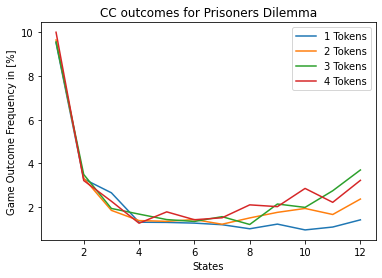

In [4]:
import matplotlib.pyplot as plt
avg_percent_outcomes_by_states_by_tokens = [[[9.528760023408973, 49.92465976179493, 40.546580214796094], [9.656737569023525, 49.593067041306014, 40.75019538967045], [9.56684113972194, 49.68131803778455, 40.751840822493506], [10.010442712302053, 49.25717754105774, 40.7323797466402]], [[3.292312346049499, 69.1460445817471, 27.561643072203385], [3.3285684557028112, 69.46081071850115, 27.21062082579603], [3.497546011601565, 68.76181505315635, 27.740638935242078], [3.2185855229908915, 69.82710147045347, 26.95431300655564]], [[2.658122599094924, 73.74849702925687, 23.593380371648202], [1.8528241304646134, 77.54479751709698, 20.6023783524384], [1.9409192914096074, 76.61340665134655, 21.44567405724383], [2.270674709876307, 75.36178660371397, 22.367538686409727]], [[1.3103808150051148, 81.21397102096728, 17.4756481640276], [1.3851905043563686, 80.77677534391198, 17.838034151731645], [1.6813292338276242, 78.57198595461443, 19.746684811557948], [1.2638682299822395, 82.21192301291313, 16.524208757104628]], [[1.302295857953564, 82.00172782843086, 16.695976313615578], [1.350373921199364, 81.76189599160384, 16.8877300871968], [1.4313276253593503, 81.59974337553932, 16.968928999101315], [1.7845859530360202, 80.21434288409468, 18.0010711628693]], [[1.2689492537242024, 83.44395376864902, 15.287096977626783], [1.431278447598444, 82.5797721578837, 15.98894939451786], [1.3455695208178287, 82.44864386053142, 16.205786618650748], [1.4240491866005658, 82.53758866649397, 16.038362146905467]], [[1.1964212329275925, 85.81669242034562, 12.986886346726783], [1.2183286745363202, 84.02704994042928, 14.754621385034406], [1.56457399631699, 85.2556499428855, 13.179776060797522], [1.513507593687232, 83.76420294508722, 14.722289461225552]], [[1.0101462082196746, 85.59393360564677, 13.395920186133552], [1.5065883134961273, 84.76605109964069, 13.727360586863176], [1.2067320050471813, 84.84776769898208, 13.945500295970731], [2.1053716928615867, 81.69648417580827, 16.19814413133015]],[[1.2238365412920893, 87.50935285050204, 11.266810608205862], [1.7620405650702193, 85.89866469787913, 12.339294737050668], [2.144220910934252, 82.88948557940952, 14.96629350965624], [2.023928289411855, 84.85933006854464, 13.116741642043511]], [[0.9577450660198684, 87.86734173210924, 11.174913201870893], [1.9407394642038067, 86.17309460126779, 11.886165934528403], [1.9894400084035528, 84.89339189121107, 13.117168100385367], [2.857791763305364, 80.72542991506461, 16.416778321630034]], [[1.0897333860652039, 87.95136168742607, 10.958904926508723], [1.6636954423112555, 86.26096915565306, 12.075335402035682], [2.7511664968343417, 83.63402278646849, 13.614810716697159], [2.221365907550811, 85.21045712090839, 12.568176971540789]], [[1.4187578106954033, 88.03644384777002, 10.544798341534591], [2.3718513199364075, 85.24369462978049, 12.384454050283107], [3.703074126781769, 81.77132062525399, 14.525605247964236], [3.2281751910481615, 81.99632381699597, 14.77550099195587]]]
cooperative_epochs_by_states_by_tokens = [[200.0, 198.8, 205.2, 220.4], [29.8, 35.2, 43.6, 32.8], [30.6, 13.0, 14.6, 20.4], [7.6, 9.0, 10.8, 7.0], [11.2, 10.4, 10.4, 25.4], [14.0, 15.0, 10.0, 15.6], [24.2, 15.8, 35.0, 28.4], [12.6, 31.6, 21.2, 46.8], [27.0, 45.6, 54.2, 43.6], [17.8, 47.8, 55.0, 67.8], [16.2, 40.8, 80.6, 67.2], [38.6, 63.8, 107.0, 95.8]]
states = 12
tokens = 4
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [avg_percent_outcomes_by_states_by_tokens[p][t][0] for p in range(states)], label=str(t+1)+' Tokens')
plt.ylabel('Game Outcome Frequency in [%]')
plt.xlabel('States')
plt.title('CC outcomes for Prisoners Dilemma')
plt.legend()
plt.show()

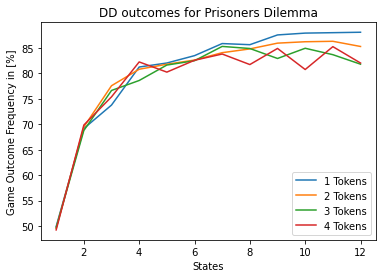

In [5]:
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [avg_percent_outcomes_by_states_by_tokens[p][t][1] for p in range(states)], label=str(t+1)+' Tokens')
plt.ylabel('Game Outcome Frequency in [%]')
plt.xlabel('States')
plt.title('DD outcomes for Prisoners Dilemma')
plt.legend()
plt.show()

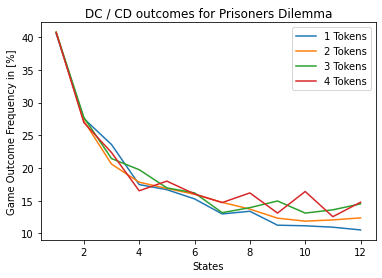

In [6]:
for t in range(tokens):
    plt.plot([s+1 for s in range(states)], [avg_percent_outcomes_by_states_by_tokens[p][t][2] for p in range(states)], label=str(t+1)+' Tokens')
plt.ylabel('Game Outcome Frequency in [%]')
plt.xlabel('States')
plt.title('DC / CD outcomes for Prisoners Dilemma')
plt.legend()
plt.show()

[[200.0, 198.8, 205.2, 220.4], [29.8, 35.2, 43.6, 32.8], [30.6, 13.0, 14.6, 20.4], [7.6, 9.0, 10.8, 7.0], [11.2, 10.4, 10.4, 25.4], [14.0, 15.0, 10.0, 15.6], [24.2, 15.8, 35.0, 28.4], [12.6, 31.6, 21.2, 46.8], [27.0, 45.6, 54.2, 43.6], [17.8, 47.8, 55.0, 67.8], [16.2, 40.8, 80.6, 67.2], [38.6, 63.8, 107.0, 95.8]]
0
1
2
3


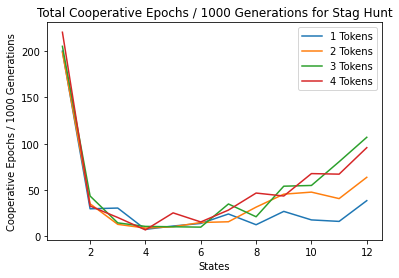

In [7]:
print(cooperative_epochs_by_states_by_tokens)
for t in range(tokens):
    print(t)
    plt.plot([s+1 for s in range(states)], [cooperative_epochs_by_states_by_tokens[s][t] for s in range(states)], label=str(t+1)+' Tokens')
plt.ylabel('Cooperative Epochs / 1000 Generations')
plt.xlabel('States')
plt.title('Total Cooperative Epochs / 1000 Generations for Stag Hunt')
plt.legend()
plt.show()

4
